# Question 1

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
house_price = pd.read_csv('train.csv')

In [3]:
print(house_price.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


### int64/float64 are numerical type while object is categorical type

#### using select_dtypes to extract only int64 columns:

In [4]:
house_price_int64 = house_price.select_dtypes(include=['int64'])
# alternatively can use: house_price_int64 = house_price.loc[:,house_price.dtypes==np.int64]

In [5]:
print(house_price_int64.dtypes)

Id               int64
MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object


### Open data_description.txt and read to see which are actual numerical type
#### Actual numerical type:
- LotArea: Lot size in square feet
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Fireplaces: Number of fireplaces
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- MiscVal: Value of miscellaneous feature

#### Categorical Type:
- Id
- MSSubClass: Identifies the type of dwelling involved in the sale.
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- MoSold: Month Sold (MM)
- YrSold: Year Sold (YYYY)

#### Unable to find:
- BedroomAbvGr
- KitchenAbvGr
- SalePrice

#### Dropping non-numerical variables:

In [6]:
house_price_numerical = house_price_int64.drop(columns=['Id','MSSubClass', 'OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold'])

In [7]:
print(house_price_numerical.dtypes)

LotArea          int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
SalePrice        int64
dtype: object


In [8]:
display(house_price_numerical)

LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0        8450         706           0        150          856       856   
1        9600         978           0        284         1262      1262   
2       11250         486           0        434          920       920   
3        9550         216           0        540          756       961   
4       14260         655           0        490         1145      1145   
...       ...         ...         ...        ...          ...       ...   
1455     7917           0           0        953          953       953   
1456    13175         790         163        589         1542      2073   
1457     9042         275           0        877         1152      1188   
1458     9717          49        1029          0         1078      1078   
1459     9937         830         290        136         1256      1256   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  ...  GarageCars  \
0          854             0       1710             1  ...           2   
1            0             0       1262             0  ...           2   
2          866             0       1786             1  ...           2   
3          756             0       1717             1  ...           3   
4         1053             0       2198             1  ...           3   
...        ...           ...        ...           ...  ...         ...   
1455       694             0       1647             0  ...           2   
1456         0             0       2073             1  ...           2   
1457      1152             0       2340             0  ...           1   
1458         0             0       1078             1  ...           1   
1459         0             0       1256             1  ...           1   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0            548           0           61              0          0   
1            460         298            0              0          0   
2            608           0           42              0          0   
3            642           0           35            272          0   
4            836         192           84              0          0   
...          ...         ...          ...            ...        ...   
1455         460           0           40              0          0   
1456         500         349            0              0          0   
1457         252           0           60              0          0   
1458         240         366            0            112          0   
1459         276         736           68              0          0   

      ScreenPorch  PoolArea  MiscVal  SalePrice  
0               0         0        0     208500  
1               0         0        0     181500  
2               0         0        0     223500  
3               0         0        0     140000  
4               0         0        0     250000  
...           ...       ...      ...        ...  
1455            0         0        0     175000  
1456            0         0        0     210000  
1457            0         0     2500     266500  
1458            0         0        0     142125  
1459            0         0        0     147500  

[1460 rows x 27 columns]

# Question 2

#### Finding Summary Statistics (Mean, Median, Quartiles etc.) of SalePrice:

In [9]:
Sale_price = house_price_numerical['SalePrice']
Sale_price.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Plotting summary statistics and distribution of SalePrice using standard Box-Plot, Histogram, KDE

<AxesSubplot:>

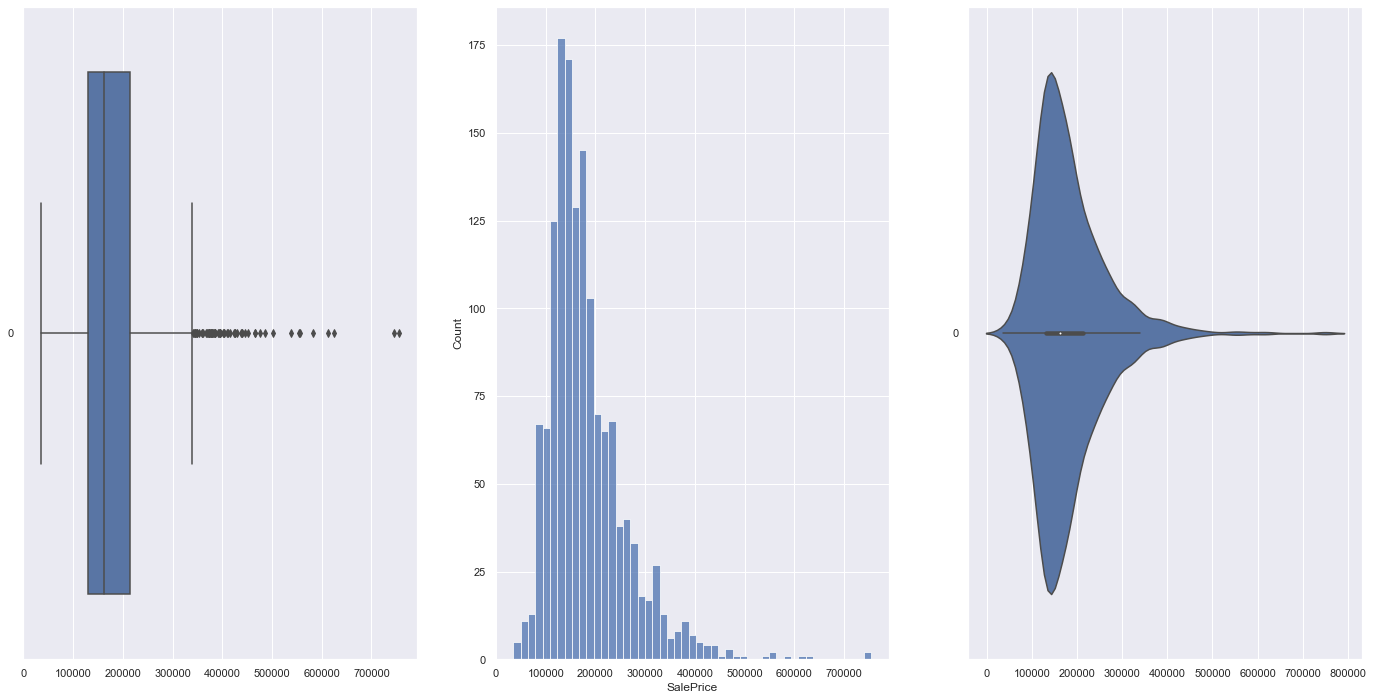

In [10]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(1, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for SalePrice
sb.boxplot(data = Sale_price, orient = "h", ax = axes[0])    # Box Plot
sb.histplot(data = Sale_price, ax = axes[1])                 # Histogram
sb.violinplot(data = Sale_price, orient = "h", ax = axes[2]) # Bot Plot + KDE

#### Finding Summary Statistics (Mean, Median, Quartiles etc.) of LotArea:

In [11]:
LotArea = house_price_numerical['LotArea']
LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

#### Plotting summary statistics and distribution of LotArea using standard Box-Plot, Histogram, KDE

<AxesSubplot:>

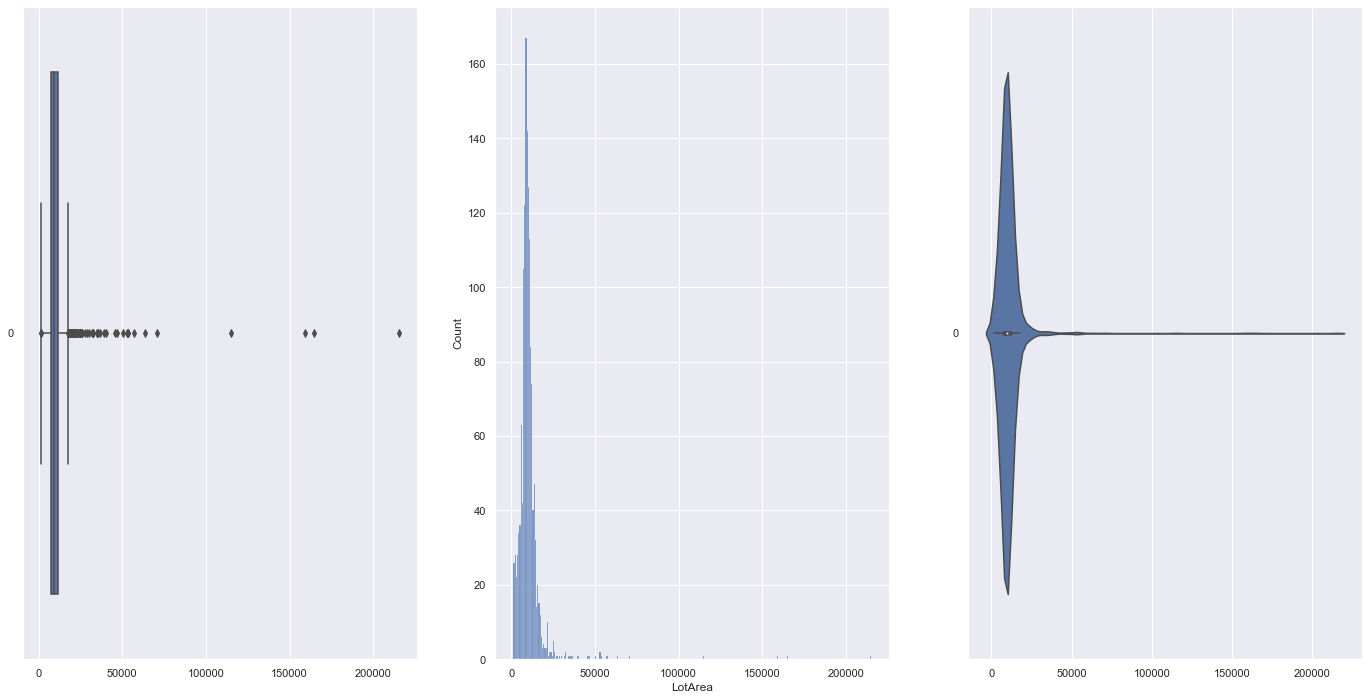

In [29]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(1, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for LotArea
sb.boxplot(data = LotArea, orient = "h", ax = axes[0])    # Box Plot
sb.histplot(data = LotArea, ax = axes[1])                 # Histogram
sb.violinplot(data = LotArea, orient = "h", ax = axes[2]) # Box Plot + KDE

#### Plotting SalePrice (y-axis) vs LotArea (x-axis) using jointplot and find correlation between them:

In [13]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([LotArea, Sale_price], axis = 1).reindex(LotArea.index)
jointDF

LotArea  SalePrice
0        8450     208500
1        9600     181500
2       11250     223500
3        9550     140000
4       14260     250000
...       ...        ...
1455     7917     175000
1456    13175     210000
1457     9042     266500
1458     9717     142125
1459     9937     147500

[1460 rows x 2 columns]

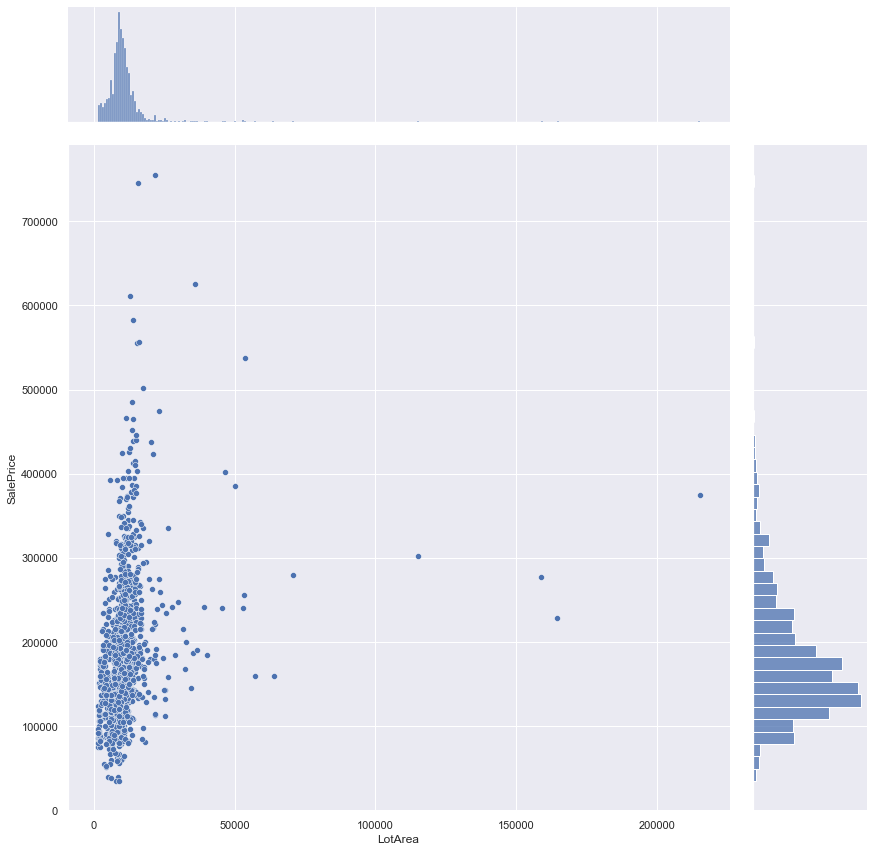

In [14]:
# Draw jointplot of the two variables in the joined dataframe
sb.jointplot(data = jointDF, x = "LotArea", y = "SalePrice", height = 12)

In [15]:
# Calculate the correlation between the two columns/variables
jointDF.corr()

LotArea  SalePrice
LotArea    1.000000   0.263843
SalePrice  0.263843   1.000000

<AxesSubplot:>

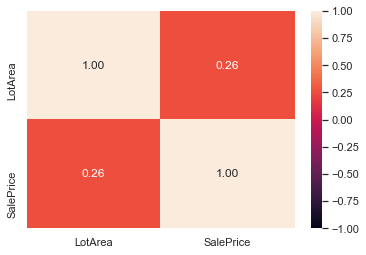

In [16]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

# Bonus Problem:

In [17]:
# New Pandas Dataframe consisting of either int64/float64
house_price_int64_float64 = house_price.select_dtypes(include=['int64','float64'])

In [18]:
house_price_int64_float64.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

#### Checking of which float64 is actual numerical datatype:
##### Actual numerical datatype:
- LotFrontage: Linear feet of street connected to property
- MasVnrArea: Masonry veneer area in square feet

##### Categorical datatype:
- GarageYrBlt: Year garage was built

In [30]:
# Dropping of Non-numerical Datatype:
house_price_numerical = house_price_int64_float64.drop(columns=['Id','MSSubClass', 'OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt'])
# dropped ID as to not interfer with heatmap and corr() later

In [20]:
display(house_price_numerical)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0            65.0     8450       196.0         706           0        150   
1            80.0     9600         0.0         978           0        284   
2            68.0    11250       162.0         486           0        434   
3            60.0     9550         0.0         216           0        540   
4            84.0    14260       350.0         655           0        490   
...           ...      ...         ...         ...         ...        ...   
1455         62.0     7917         0.0           0           0        953   
1456         85.0    13175       119.0         790         163        589   
1457         66.0     9042         0.0         275           0        877   
1458         68.0     9717         0.0          49        1029          0   
1459         75.0     9937         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  GarageCars  \
0             856       856       854             0  ...           2   
1            1262      1262         0             0  ...           2   
2             920       920       866             0  ...           2   
3             756       961       756             0  ...           3   
4            1145      1145      1053             0  ...           3   
...           ...       ...       ...           ...  ...         ...   
1455          953       953       694             0  ...           2   
1456         1542      2073         0             0  ...           2   
1457         1152      1188      1152             0  ...           1   
1458         1078      1078         0             0  ...           1   
1459         1256      1256         0             0  ...           1   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0            548           0           61              0          0   
1            460         298            0              0          0   
2            608           0           42              0          0   
3            642           0           35            272          0   
4            836         192           84              0          0   
...          ...         ...          ...            ...        ...   
1455         460           0           40              0          0   
1456         500         349            0              0          0   
1457         252           0           60              0          0   
1458         240         366            0            112          0   
1459         276         736           68              0          0   

      ScreenPorch  PoolArea  MiscVal  SalePrice  
0               0         0        0     208500  
1               0         0        0     181500  
2               0         0        0     223500  
3               0         0        0     140000  
4               0         0        0     250000  
...           ...       ...      ...        ...  
1455            0         0        0     175000  
1456            0         0        0     210000  
1457            0         0     2500     266500  
1458            0         0        0     142125  
1459            0         0        0     147500  

[1460 rows x 29 columns]

In [21]:
house_price_numerical.describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1201.000000    1460.000000  1452.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082   103.685262   443.639726    46.549315   
std      24.284752    9981.264932   181.066207   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      59.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      80.000000   11601.500000   166.000000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  ...   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521  ...   
std     441.866955   438.705324   386.587738   436.528436     48.623081  ...   
min       0.000000     0.000000   334.000000     0.000000      0.000000  ...   
25%     223.000000   795.750000   882.000000     0.000000      0.000000  ...   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000  ...   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000  ...   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000  ...   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000       0.000000   
max       4.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal      SalePrice  
count  1460.000000  1460.000000  1460.000000   1460.000000    1460.000000  
mean      3.409589    15.060959     2.758904     43.489041  180921.195890  
std      29.317331    55.757415    40.177307    496.123024   79442.502883  
min       0.000000     0.000000     0.000000      0.000000   34900.000000  
25%       0.000000     0.000000     0.000000      0.000000  129975.000000  
50%       0.000000     0.000000     0.000000      0.000000  163000.000000  
75%       0.000000     0.000000     0.000000      0.000000  214000.000000  
max     508.000000   480.000000   738.000000  15500.000000  755000.000000  

[8 rows x 29 columns]

In [22]:
# Calculate the complete correlation matrix
house_price_numerical.corr()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
LotFrontage       1.000000  0.426095    0.193458    0.233633    0.049900   
LotArea           0.426095  1.000000    0.104160    0.214103    0.111170   
MasVnrArea        0.193458  0.104160    1.000000    0.264736   -0.072319   
BsmtFinSF1        0.233633  0.214103    0.264736    1.000000   -0.050117   
BsmtFinSF2        0.049900  0.111170   -0.072319   -0.050117    1.000000   
BsmtUnfSF         0.132644 -0.002618    0.114442   -0.495251   -0.209294   
TotalBsmtSF       0.392075  0.260833    0.363936    0.522396    0.104810   
1stFlrSF          0.457181  0.299475    0.344501    0.445863    0.097117   
2ndFlrSF          0.080177  0.050986    0.174561   -0.137079   -0.099260   
LowQualFinSF      0.038469  0.004779   -0.069071   -0.064503    0.014807   
GrLivArea         0.402797  0.263116    0.390857    0.208171   -0.009640   
BsmtFullBath      0.100949  0.158155    0.085310    0.649212    0.158678   
BsmtHalfBath     -0.007234  0.048046    0.026673    0.067418    0.070948   
FullBath          0.198769  0.126031    0.276833    0.058543   -0.076444   
HalfBath          0.053532  0.014259    0.201444    0.004262   -0.032148   
BedroomAbvGr      0.263170  0.119690    0.102821   -0.107355   -0.015728   
KitchenAbvGr     -0.006069 -0.017784   -0.037610   -0.081007   -0.040751   
TotRmsAbvGrd      0.352096  0.190015    0.280682    0.044316   -0.035227   
Fireplaces        0.266639  0.271364    0.249070    0.260011    0.046921   
GarageCars        0.285691  0.154871    0.364204    0.224054   -0.038264   
GarageArea        0.344997  0.180403    0.373066    0.296970   -0.018227   
WoodDeckSF        0.088521  0.171698    0.159718    0.204306    0.067898   
OpenPorchSF       0.151972  0.084774    0.125703    0.111761    0.003093   
EnclosedPorch     0.010700 -0.018340   -0.110204   -0.102303    0.036543   
3SsnPorch         0.070029  0.020423    0.018796    0.026451   -0.029993   
ScreenPorch       0.041383  0.043160    0.061466    0.062021    0.088871   
PoolArea          0.206167  0.077672    0.011723    0.140491    0.041709   
MiscVal           0.003368  0.038068   -0.029815    0.003571    0.004940   
SalePrice         0.351799  0.263843    0.477493    0.386420   -0.011378   

               BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  \
LotFrontage     0.132644     0.392075  0.457181  0.080177      0.038469  ...   
LotArea        -0.002618     0.260833  0.299475  0.050986      0.004779  ...   
MasVnrArea      0.114442     0.363936  0.344501  0.174561     -0.069071  ...   
BsmtFinSF1     -0.495251     0.522396  0.445863 -0.137079     -0.064503  ...   
BsmtFinSF2     -0.209294     0.104810  0.097117 -0.099260      0.014807  ...   
BsmtUnfSF       1.000000     0.415360  0.317987  0.004469      0.028167  ...   
TotalBsmtSF     0.415360     1.000000  0.819530 -0.174512     -0.033245  ...   
1stFlrSF        0.317987     0.819530  1.000000 -0.202646     -0.014241  ...   
2ndFlrSF        0.004469    -0.174512 -0.202646  1.000000      0.063353  ...   
LowQualFinSF    0.028167    -0.033245 -0.014241  0.063353      1.000000  ...   
GrLivArea       0.240257     0.454868  0.566024  0.687501      0.134683  ...   
BsmtFullBath   -0.422900     0.307351  0.244671 -0.169494     -0.047143  ...   
BsmtHalfBath   -0.095804    -0.000315  0.001956 -0.023855     -0.005842  ...   
FullBath        0.288886     0.323722  0.380637  0.421378     -0.000710  ...   
HalfBath       -0.041118    -0.048804 -0.119916  0.609707     -0.027080  ...   
BedroomAbvGr    0.166643     0.050450  0.127401  0.502901      0.105607  ...   
KitchenAbvGr    0.030086    -0.068901  0.068101  0.059306      0.007522  ...   
TotRmsAbvGrd    0.250647     0.285573  0.409516  0.616423      0.131185  ...   
Fireplaces      0.051575     0.339519  0.410531  0.194561     -0.021272  ...   
GarageCars      0.214175     0.434585  0.439317  0.183926     -0.094480  ...   
GarageArea      0.183303     0.486665  0.489782  0.138

<AxesSubplot:>

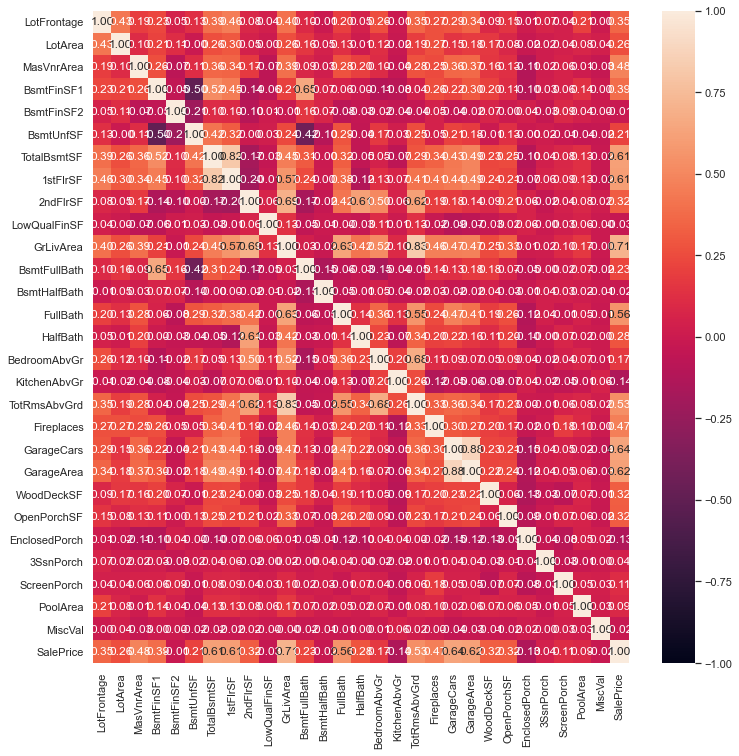

In [23]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(house_price_numerical.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

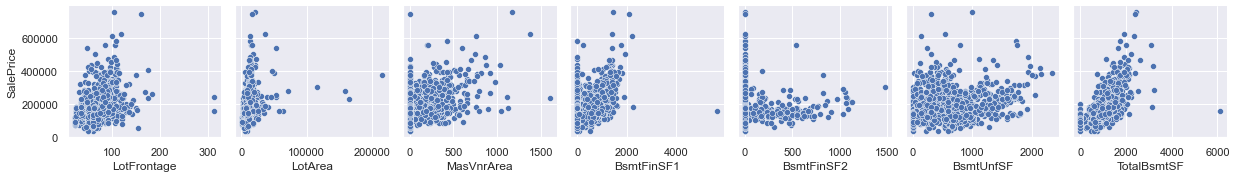

In [24]:
# Draw pairs of SalePrice vs each of the Numeric variables
sb.pairplot(data = house_price_numerical,x_vars=["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF"],y_vars=["SalePrice"])

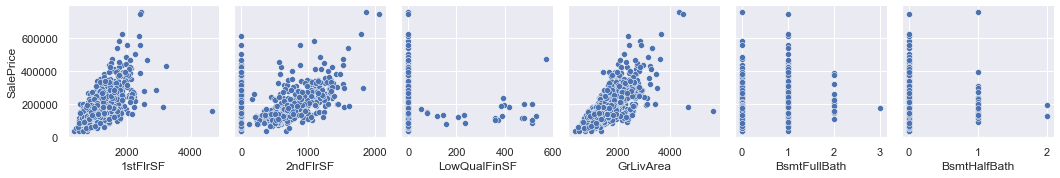

In [25]:
sb.pairplot(data = house_price_numerical,x_vars=["1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath"],y_vars=["SalePrice"])

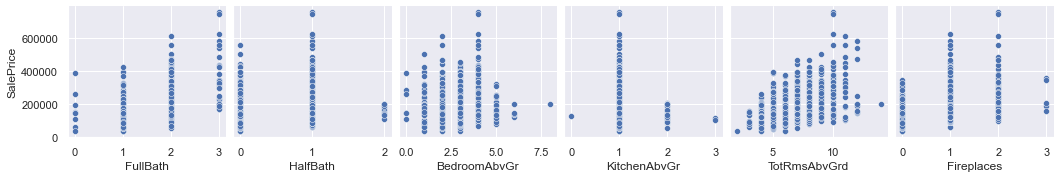

In [26]:
sb.pairplot(data = house_price_numerical,x_vars=["FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces"],y_vars=["SalePrice"])

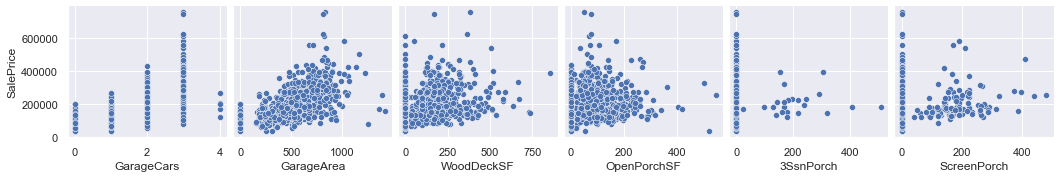

In [27]:
sb.pairplot(data = house_price_numerical,x_vars=["GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","3SsnPorch","ScreenPorch"],y_vars=["SalePrice"])

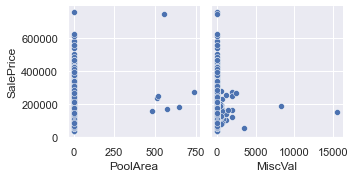

In [28]:
sb.pairplot(data = house_price_numerical,x_vars=["PoolArea","MiscVal"],y_vars=["SalePrice"])